In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
import numpy as np
import plotly.express as px


In [2]:
df=pd.read_csv('data/Liver_disease_data.csv')

In [3]:
df

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


# melihat tipe data

In [4]:
df.dtypes

Age                     int64
Gender                  int64
BMI                   float64
AlcoholConsumption    float64
Smoking                 int64
GeneticRisk             int64
PhysicalActivity      float64
Diabetes                int64
Hypertension            int64
LiverFunctionTest     float64
Diagnosis               int64
dtype: object

# melihat nama pada kolom

In [5]:
df.columns

Index(['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')

# memeriksa parameter statistik

In [6]:
df.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


## Melihat mean secara manual

In [7]:
def calculate_mean(data):
    return sum(data) / len(data)

columns_mean = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_mean:
    mean_value = calculate_mean(df[column])
    print(f"Mean {column}: {mean_value}")

Mean Age: 50.39411764705882
Mean Gender: 0.5041176470588236
Mean BMI: 27.699801478712146
Mean AlcoholConsumption: 9.832309483254367
Mean Smoking: 0.2917647058823529
Mean GeneticRisk: 0.5217647058823529
Mean PhysicalActivity: 5.0009929766095915
Mean Diabetes: 0.1423529411764706
Mean Hypertension: 0.15470588235294117
Mean LiverFunctionTest: 59.863866812344014


## Melihat median secara manual

In [8]:
def calculate_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    if n % 2 == 0:
        median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        median = sorted_data[n//2]
    return median

columns_median = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_median:
    median_value = calculate_median(df[column])
    print(f"Median {column}: {median_value}")

Median Age: 51.0
Median Gender: 1.0
Median BMI: 27.925366510531127
Median AlcoholConsumption: 9.828194960947611
Median Smoking: 0.0
Median GeneticRisk: 0.0
Median PhysicalActivity: 5.022882911285647
Median Diabetes: 0.0
Median Hypertension: 0.0
Median LiverFunctionTest: 59.513145574356045


## Melihat mudus secara manual

In [9]:
from collections import Counter

def calculate_modus(data):
    frequency = Counter(data)
    max_count = max(frequency.values())
    mode = [key for key, count in frequency.items() if count == max_count]
    return mode

columns_modus = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_modus:
    modus_value = calculate_modus(df[column])
    print(f"Modus {column}: {modus_value}")

Modus Age: [52]
Modus Gender: [1]
Modus BMI: [35.857584148869186, 30.732470150268405, 19.9714069443824, 16.615416996102155, 16.06583023217582, 24.28521419125352, 21.64627841635784, 31.152253086562705, 27.483345874465456, 21.65048195013452, 18.730944448754403, 18.17999406718624, 36.61650980351044, 21.08694921012168, 31.29276619777421, 35.26714819965666, 30.3520327796184, 36.48913079117364, 24.809843038211863, 38.90555476622371, 18.328625104452424, 17.553738241438452, 31.46730365518609, 38.57077853533154, 35.2220865409082, 16.910421485951286, 21.98419284836791, 38.2579721209456, 21.32646082001961, 34.52926059467298, 35.62830489821759, 27.386302586524543, 24.65872274620789, 26.253110810493997, 20.674117359134105, 37.23477290322111, 26.265491418243947, 37.06148601140249, 17.64233699765685, 39.70688177500328, 26.081827186090457, 16.195770509852636, 15.950546205936371, 33.65518143704597, 31.47588835509202, 35.053263953189685, 17.63418834882015, 15.88927167588871, 27.71448223618946, 24.689880

## Melihat mudus

In [10]:
df.mode()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,52.0,1.0,15.004710,0.003731,0.0,0.0,0.001852,0.0,0.0,20.019254,1.0
1,NaN,NaN,15.011070,0.018588,NaN,NaN,0.011315,NaN,NaN,20.051157,NaN
2,NaN,NaN,15.046997,0.026925,NaN,NaN,0.013555,NaN,NaN,20.090290,NaN
3,NaN,NaN,15.050463,0.032875,NaN,NaN,0.019319,NaN,NaN,20.592277,NaN
4,NaN,NaN,15.052596,0.062818,NaN,NaN,0.027012,NaN,NaN,20.705807,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1695,NaN,NaN,39.906557,19.912757,NaN,NaN,9.971703,NaN,NaN,99.773850,NaN
1696,NaN,NaN,39.926954,19.927966,NaN,NaN,9.985982,NaN,NaN,99.826912,NaN
1697,NaN,NaN,39.986656,19.931313,NaN,NaN,9.988993,NaN,NaN,99.855828,NaN
1698,NaN,NaN,39.988598,19.938184,NaN,NaN,9.993163,NaN,NaN,99.859513,NaN


## mengintung range secara manual

In [11]:
def calculate_range(data):
    return max(data) - min(data)

columns_range = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_range:
    range_value = calculate_range(df[column])
    print(f"range {column}: {range_value}")

range Age: 60
range Gender: 1
range BMI: 24.9881351149833
range AlcoholConsumption: 19.948725881614443
range Smoking: 1
range GeneticRisk: 2
range PhysicalActivity: 9.993111551232788
range Diabetes: 1
range Hypertension: 1
range LiverFunctionTest: 79.97215975697176


## mengintung varianc secara manual

In [12]:
def calculate_variance(data):
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return variance

columns_variance = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_variance:
    variance_value = calculate_variance(df[column])
    print(f"variance {column}: {variance_value}")

variance Age: 311.05408304498314
variance Gender: 0.24998304498270446
variance BMI: 51.959287739983964
variance AlcoholConsumption: 33.12897961626373
variance Smoking: 0.20663806228373868
variance GeneticRisk: 0.44364394463667467
variance PhysicalActivity: 8.101060950887703
variance Diabetes: 0.12208858131487484
variance Hypertension: 0.1307719723183373
variance LiverFunctionTest: 528.5170061573366


## mengintung STD secara manual

In [13]:
import math

def calculate_std_deviation(data):
    variance = calculate_variance(data)
    std_deviation = math.sqrt(variance)
    return std_deviation

columns_std = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_std:
    std_value = calculate_std_deviation(df[column])
    print(f"std {column}: {std_value}")

std Age: 17.636725405952863
std Gender: 0.4999830446952221
std BMI: 7.208279110854682
std AlcoholConsumption: 5.755777933195801
std Smoking: 0.4545745948507667
std GeneticRisk: 0.6660660212296335
std PhysicalActivity: 2.8462362781202306
std Diabetes: 0.34941176470587654
std Hypertension: 0.36162407596610224
std LiverFunctionTest: 22.989497736082374


## mengitung skewness secara manual

In [14]:
def calculate_skewness(data):
    mean = calculate_mean(data)
    std_deviation = calculate_std_deviation(data)
    n = len(data)
    skewness = (sum((x - mean) ** 3 for x in data) / n) / (std_deviation ** 3)
    return skewness

columns_skewness = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_skewness:
    skewness_value = calculate_skewness(df[column])
    print(f"skewness {column}: {skewness_value}")

skewness Age: -0.04077164105765296
skewness Gender: -0.01647114678192215
skewness BMI: -0.07187514045316605
skewness AlcoholConsumption: 0.018216200641938286
skewness Smoking: 0.9161765592554009
skewness GeneticRisk: 0.9057308894479327
skewness PhysicalActivity: -0.023387906805268293
skewness Diabetes: 2.0471380471381684
skewness Hypertension: 1.9096854473783471
skewness LiverFunctionTest: 0.040115486207552245


## mengitung Kurtosis secara manual

In [15]:
def calculate_kurtosis(data):
    mean = calculate_mean(data)
    std_deviation = calculate_std_deviation(data)
    n = len(data)
    kurtosis = (sum((x - mean) ** 4 for x in data) / n) / (std_deviation ** 4) - 3
    return kurtosis

columns_kurtosis = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_kurtosis:
    kurtosis_value = calculate_kurtosis(df[column])
    print(f"kurtosis {column}: {kurtosis_value}")

kurtosis Age: -1.1724408372808908
kurtosis Gender: -1.9997287013237444
kurtosis BMI: -1.1801249093906034
kurtosis AlcoholConsumption: -1.2243981419966734
kurtosis Smoking: -1.1606205122709032
kurtosis GeneticRisk: -0.34156756093960317
kurtosis PhysicalActivity: -1.1354166519929432
kurtosis Diabetes: 2.1907741840406496
kurtosis Hypertension: 1.6468985079287526
kurtosis LiverFunctionTest: -1.1854167376087006


## mengitung Kurtosis dan Skewness secara libray

In [16]:
kurtosis_pandas = df.kurt()
print("Hasil Kurtosis (Pandas):\n",kurtosis_pandas)
skewness_pandas = df.skew()
print("hasil Skewness (Pandas):\n",skewness_pandas)


Hasil Kurtosis (Pandas):
 Age                  -1.172359
Gender               -2.002085
BMI                  -1.180065
AlcoholConsumption   -1.224469
Smoking              -1.160504
GeneticRisk          -0.339037
PhysicalActivity     -1.135225
Diabetes              2.200769
Hypertension          1.655290
LiverFunctionTest    -1.185373
Diagnosis            -1.960865
dtype: float64
hasil Skewness (Pandas):
 Age                  -0.040808
Gender               -0.016486
BMI                  -0.071939
AlcoholConsumption    0.018232
Smoking               0.916986
GeneticRisk           0.906531
PhysicalActivity     -0.023409
Diabetes              2.048946
Hypertension          1.911372
LiverFunctionTest     0.040151
Diagnosis            -0.203576
dtype: float64


## cek apakah ada data kosong

In [17]:
df.isnull().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

## melihat distubisi data

penjelasan data
Usia: Rentang: 20 hingga 80 tahun.
Jenis Kelamin: Laki-laki (0) atau Perempuan (1).
BMI (Indeks Massa Tubuh): Rentang: 15 hingga 40.
Konsumsi Alkohol: Rentang: 0 hingga 20  per minggu.
Merokok: Tidak (0) atau Ya (1).
Risiko Genetik: Rendah (0), Sedang (1), Tinggi (2).
Aktivitas Fisik: Rentang: 0 hingga 10 jam per minggu.
Diabetes: Tidak (0) atau Ya (1).
Hipertensi: Tidak (0) atau Ya (1).
Tes Fungsi Hati: Rentang: 20 hingga 100.
Diagnosis: Indikator biner (0 atau 1) dari  penyakit hati.

<Figure size 1500x1000 with 0 Axes>

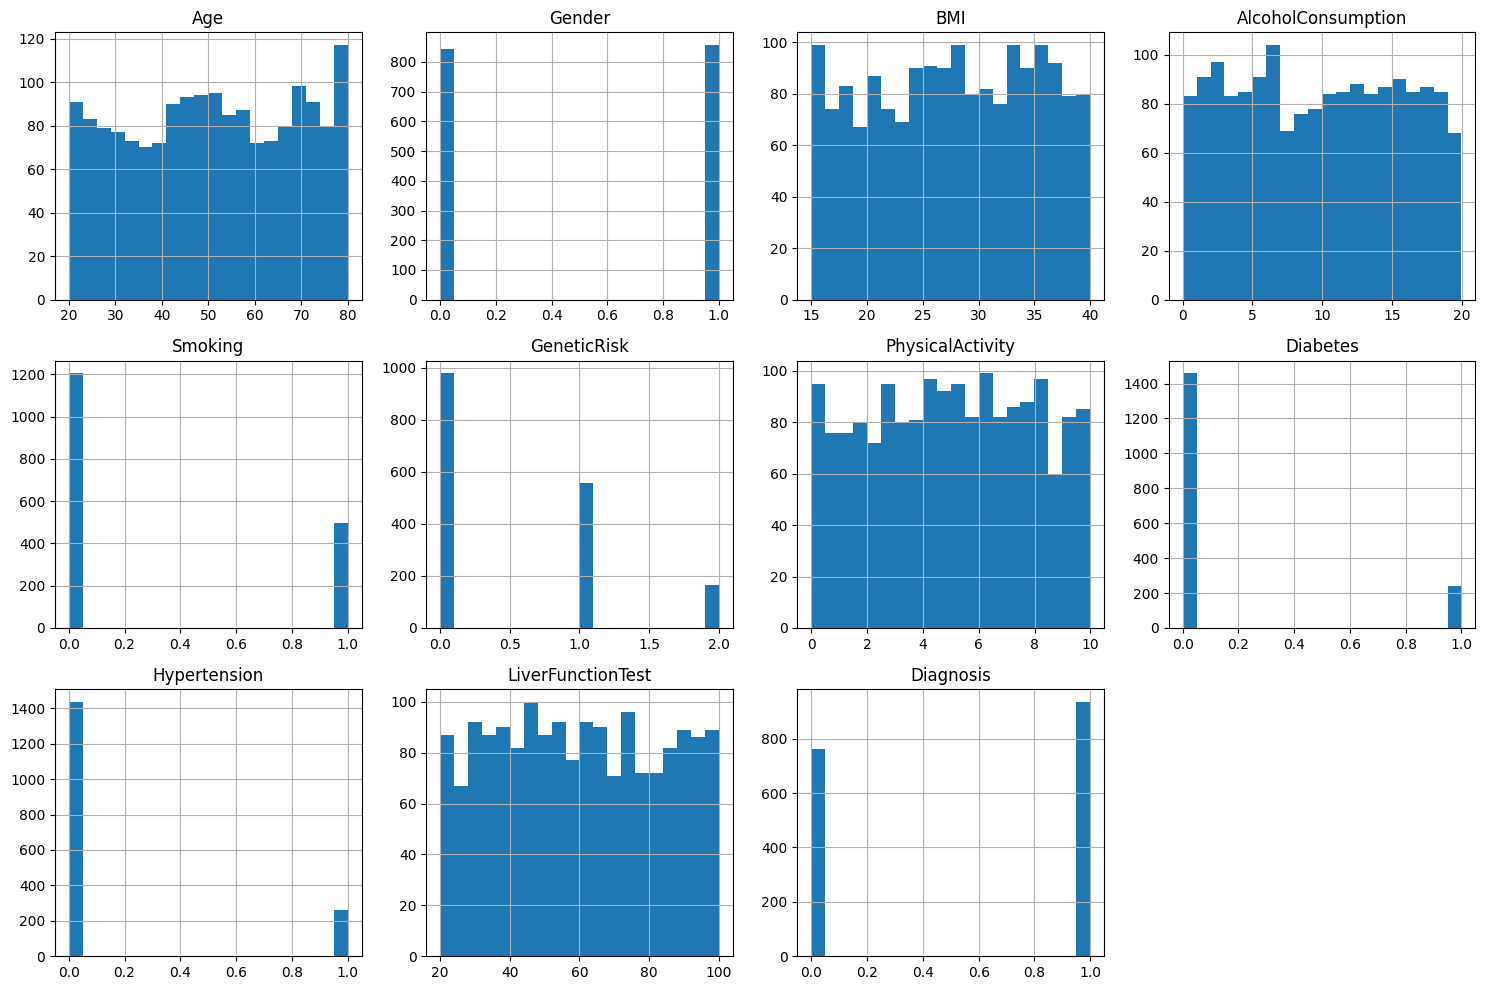

In [18]:
plt.figure(figsize=(15, 10))

df.hist(bins=20, figsize=(15, 10), layout=(3, 4))

plt.tight_layout()
plt.show()

## melihat distubisi data

In [19]:

for col in df.columns:
    if col != "Diagnosis":
        fig = px.histogram(df, x=col, color="Diagnosis", title=f"{col} Distribution", color_discrete_sequence=px.colors.sequential.Agsunset_r)
        fig.show()

## melihat korelasi data dg heat map

<Axes: >

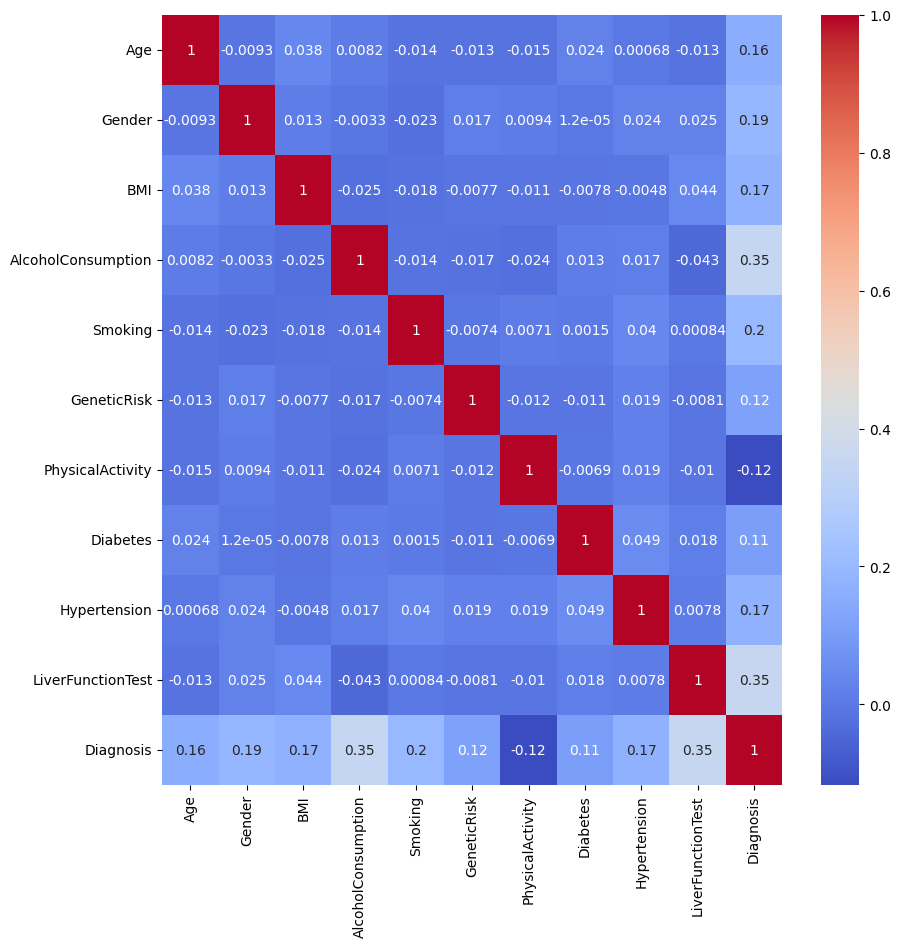

In [20]:
corr = df.corr()
fig = plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True, cmap="coolwarm")

## melihat korelasi dg metode Pearson

In [21]:
def calculate_Pearson(x1, y1):
    n = len(x1)  
    N = (n * np.sum(x1 * y1) - np.sum(x1) * np.sum(y1))
    d = np.sqrt((n * np.sum(x1 * x1) - np.sum(x1) ** 2) * (n * np.sum(y1 * y1) - np.sum(y1) ** 2))
    Pearson = N / d
    return Pearson

columns_Pearson = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
                   'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']

for column in columns_Pearson:
    Pearson_value = calculate_Pearson(df[column], df['Diagnosis'])
    print(f"Pearson correlation antara {column} dan Diagnosis: {Pearson_value}")


Pearson correlation antara Age dan Diagnosis: 0.1560990181033164
Pearson correlation antara Gender dan Diagnosis: 0.18955765786410042
Pearson correlation antara BMI dan Diagnosis: 0.1676550229852762
Pearson correlation antara AlcoholConsumption dan Diagnosis: 0.34961021439385986
Pearson correlation antara Smoking dan Diagnosis: 0.200070511444357
Pearson correlation antara GeneticRisk dan Diagnosis: 0.1182922869286551
Pearson correlation antara PhysicalActivity dan Diagnosis: -0.11668933377271815
Pearson correlation antara Diabetes dan Diagnosis: 0.10747963689870643
Pearson correlation antara Hypertension dan Diagnosis: 0.17068266238605967
Pearson correlation antara LiverFunctionTest dan Diagnosis: 0.3540027452907404


## persiapan data (data preprocessing)

In [22]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1360, 10)
(340, 10)
(1360,)
(340,)


## membuat Logistic Regression dg libray dan membuat laporan hasil prediksi

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.83      0.77      0.79       162
           1       0.80      0.85      0.83       178

    accuracy                           0.81       340
   macro avg       0.81      0.81      0.81       340
weighted avg       0.81      0.81      0.81       340



## membuat Random Forest dg libray dan membuat laporan hasil prediksi

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)#rf membuat 100 pohon keputusan yang dilatih dg subset acak dari data seed 42.
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Report
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       162
           1       0.87      0.94      0.91       178

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340



## confusion_matri RF

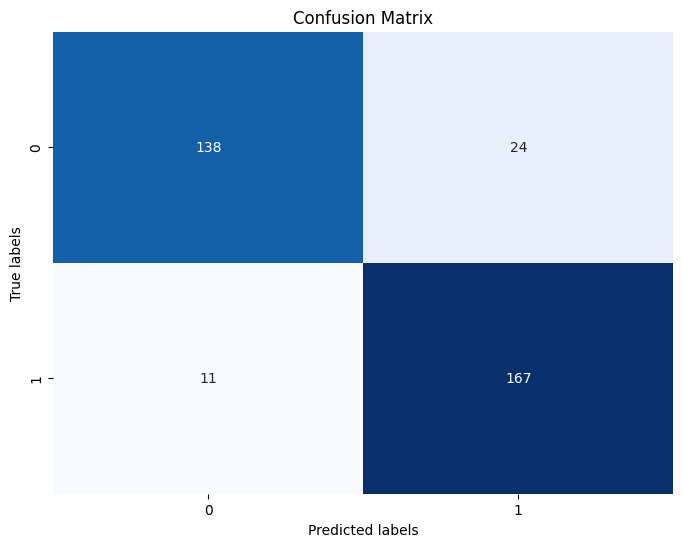

In [25]:
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## confusion_matri logistic

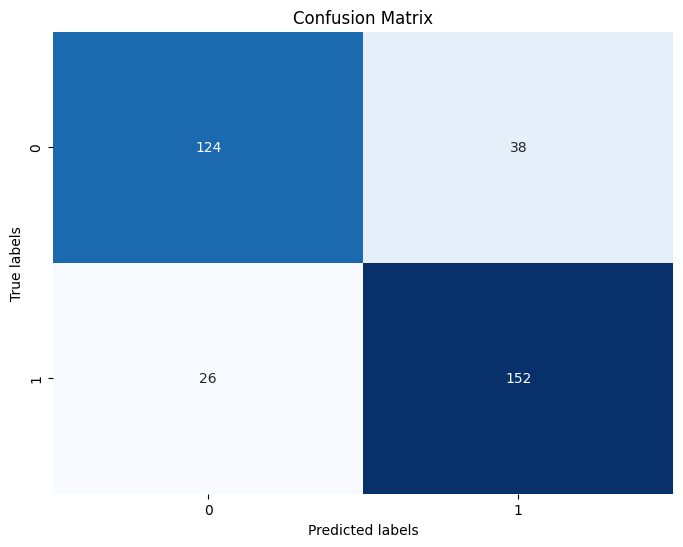

In [26]:
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Membuat Random Forest secara Manual

In [27]:
class RandomForestClassifierManual:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []
        self.feature_indices = []
        np.random.seed(self.random_state)
    
    def fit(self, X, y):
        self.estimators = []
        self.feature_indices = []
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        y = np.array(y)  # Ensure y is a NumPy array
        
        for _ in range(self.n_estimators):
            #  sampling dg bootstrap sampling
            sample_indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]
            
            # memilih random Feature(x)
            feature_indices = np.random.choice(n_features, size=int(np.sqrt(n_features)), replace=False)
            self.feature_indices.append(feature_indices)
            X_subsampled = X_sampled[:, feature_indices]
            
            # membuat Decision tree dari subsampled data dan features.
            tree = self._build_tree(X_subsampled, y_sampled, depth=0)
            self.estimators.append(tree)
    
    def _build_tree(self, X, y, depth):#membuat decision tree 
        # Simple decision tree 
        unique_classes, counts = np.unique(y, return_counts=True)
        majority_class = unique_classes[np.argmax(counts)]
        
        if depth == self.max_depth or len(np.unique(y)) == 1:#jika depth sudah mencapai maksimum maka returns leaf node dg majority class
            return {'prediction': majority_class}
        
        # memilih split dari left dan right subtrees.
        best_split = self._get_best_split(X, y)
        left_indices = best_split['left_indices']
        right_indices = best_split['right_indices']
        
        if len(left_indices) == 0 or len(right_indices) == 0:
            return {'prediction': majority_class}
        
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return {'feature_index': best_split['feature_index'],
                'threshold': best_split['threshold'],
                'left': left_tree,
                'right': right_tree}
    
    def _get_best_split(self, X, y):
        best_split = {}
        best_gini = float('inf')
        n_samples, n_features = X.shape
        
        for feature_index in range(n_features):
            unique_values = np.unique(X[:, feature_index])
            for threshold in unique_values:
                left_indices = np.where(X[:, feature_index] <= threshold)[0]
                right_indices = np.where(X[:, feature_index] > threshold)[0]
                
                gini = self._gini_index(y[left_indices], y[right_indices])
                
                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature_index': feature_index,
                                  'threshold': threshold,
                                  'left_indices': left_indices,
                                  'right_indices': right_indices}
        
        return best_split
    
    def _gini_index(self, left_y, right_y):#
        p_left = len(left_y) / (len(left_y) + len(right_y))
        p_right = len(right_y) / (len(left_y) + len(right_y))
        gini_left = 1.0 - sum((np.sum(left_y == c) / len(left_y)) ** 2 for c in np.unique(left_y))
        gini_right = 1.0 - sum((np.sum(right_y == c) / len(right_y)) ** 2 for c in np.unique(right_y))
        gini = p_left * gini_left + p_right * gini_right
        return gini
    
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            instance = X[i]
            row_predictions = []
            for tree in self.estimators:
                row_predictions.append(self._predict_tree(instance[self.feature_indices[self.estimators.index(tree)]], tree))
            predictions.append(max(row_predictions, key=row_predictions.count))
        return np.array(predictions)
    
    def _predict_tree(self, instance, tree):
        if 'prediction' in tree:
            return tree['prediction']
        else:
            if instance[tree['feature_index']] <= tree['threshold']:
                return self._predict_tree(instance, tree['left'])
            else:
                return self._predict_tree(instance, tree['right'])
            
#pembuktian model
model = RandomForestClassifierManual(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.74


## Membuat Logistic Regression secara Manual

In [28]:
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.theta) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.theta -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]
    
log_reg_manual = LogisticRegressionManual()
log_reg_manual.fit(X_train, y_train)
predictions = log_reg_manual.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## Membuat Cros validasi 

Logistic Regression 10-fold Cross-Validation Accuracy: 0.83 ± 0.03
Random Forest 10-fold Cross-Validation Accuracy: 0.88 ± 0.03
Logistic Regression Test Accuracy: 0.81
Random Forest Test Accuracy: 0.90


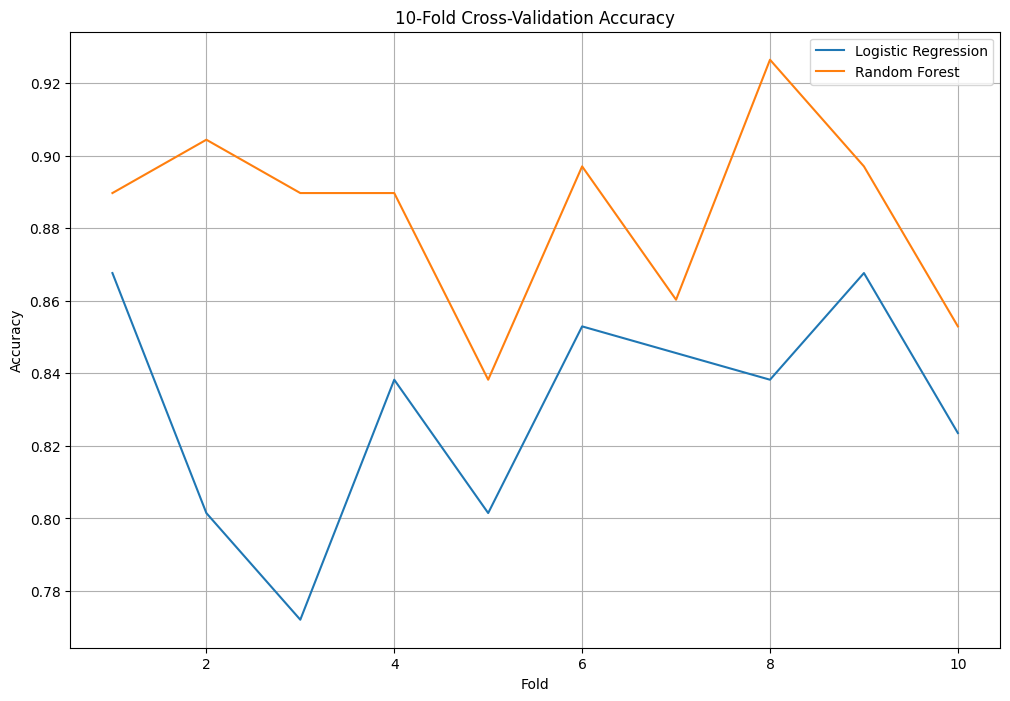

In [29]:
log_reg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)


# Define k-fold cross 
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metric
scoring = make_scorer(accuracy_score)

# melakukan 10-fold cross-validation
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring=scoring)
rf_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring=scoring)


# Train models pada training data
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict pada test data
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# kalkulasi test accuracy
test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print cross-validation dan test accuracy
print("Logistic Regression 10-fold Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(log_reg_scores.mean(), log_reg_scores.std()))
print("Random Forest 10-fold Cross-Validation Accuracy: {:.2f} ± {:.2f}".format(rf_scores.mean(), rf_scores.std()))

print("Logistic Regression Test Accuracy: {:.2f}".format(test_accuracy_log_reg))
print("Random Forest Test Accuracy: {:.2f}".format(test_accuracy_rf))

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), log_reg_scores, label='Logistic Regression')
plt.plot(range(1, 11), rf_scores, label='Random Forest')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('10-Fold Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Membuat Prediksi mengunakan RF

In [30]:
#  data yang akan  masukan 
X_new = [[58, 0, 35.857584, 17.272828, 0, 1, 0.658940, 0, 0, 42.734240]]  

# Menggunakan model untuk memprediksi label dari data masukan baru
y_pred_new = rf.predict(X_new)

# Menampilkan prediksi
print("hasil predikisi:")
print(y_pred_new)


hasil predikisi:
[1]
